## Import Packages

In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
from pyspark.sql.functions import col

In [4]:
from pyspark.sql.functions import desc

In [5]:
from pyspark.sql.functions import asc

In [6]:
import findspark

In [7]:
findspark.init()

In [8]:
spark = SparkSession.builder.appName('60MDash').getOrCreate()

In [9]:
Mens60m = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','Men60m.csv').load()

In [10]:
Womens60m = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','Womens60m.csv').load()

In [11]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

## Create Views

In [12]:
Mens60m.createOrReplaceTempView("Mens60m")

In [13]:
Womens60m.createOrReplaceTempView("Womens60m")

In [14]:
resultone = spark.sql("SELECT * FROM Mens60m")
resultone.show()

+--------------------+------+-------------------+
|               Names| Times|            Schools|
+--------------------+------+-------------------+
|(1) Terrence JONESFR| 6.45 |         Texas Tech|
|(1) Christian COL...|6.45📺|          Tennessee|
|(1) Leonard MYLES...| 6.45 |                BYU|
|       — Jones {2}SO|6.46📺|         Texas Tech|
|       — Jones {3}SO| 6.46 |         Texas Tech|
|  (4) Marcus BRUNSON| 6.46 |      Arizona State|
|  (5) Ronnie BAKERSR| 6.47 |                TCU|
|       — Baker {2}SR|6.47📺|                TCU|
|       — Jones {4}SO| 6.48 |         Texas Tech|
|(6) Micah WILLIAMSFR| 6.48 |             Oregon|
|    — Williams {2}FR| 6.48 |             Oregon|
|(6) Cameron BURRE...| 6.48 |            Houston|
| (6) Leonard SCOTTJR| 6.48 |          Tennessee|
|       — Scott {2}JR| 6.48 |          Tennessee|
|   — Myles-Mills {2}| 6.48 |                BYU|
|    — Williams {3}SO|6.49📺|             Oregon|
|    — Williams {4}FR| 6.49 |             Oregon|
|   

In [15]:
resulttwo = spark.sql("SELECT * FROM Womens60m")
resulttwo.show()

+--------------------+------+-------------------+
|               Names| Times|            Schools|
+--------------------+------+-------------------+
| (1) Julien ALFREDSR|6.94📺|              Texas|
|      — Alfred {2}SR|6.96📺|              Texas|
|      — Alfred {3}SR|6.97📺|              Texas|
|      — Alfred {4}SR|7.00📺|              Texas|
|      — Alfred {5}SR|7.02📺|              Texas|
|      — Alfred {6}SR| 7.03 |              Texas|
| (2) Jacious SEARSJR| 7.04 |          Tennessee|
|      — Alfred {7}JR| 7.04 |              Texas|
|      — Alfred {8}SR| 7.05 |              Texas|
|      — Alfred {9}SR| 7.05 |              Texas|
|  (3) Kemba NELSONJR|7.05📺|             Oregon|
| (4) Kaila JACKSONFR| 7.07 |            Georgia|
|    (4) Jadyn MAYSSO| 7.07 |             Oregon|
| (4) Samirah MOODYSO| 7.07 |Southern California|
|   (4) Aleia HOBBSSR| 7.07 |                LSU|
|(4) Hannah CUNLIF...| 7.07 |             Oregon|
|     — Jackson {2}FR| 7.08 |            Georgia|
| (9) 

## Query One - Times

In [16]:
QueryOneA = spark.sql("SELECT Times, COUNT(*) as count FROM Mens60m GROUP BY Times ORDER BY count DESC")
QueryOneA.show()

+------+-----+
| Times|count|
+------+-----+
| 6.52 |   21|
| 6.51 |   10|
| 6.48 |    7|
| 6.50 |    4|
|6.51📺|    3|
| 6.49 |    3|
| 6.46 |    2|
| 6.45 |    2|
|6.49📺|    1|
|6.46📺|    1|
|6.47📺|    1|
|6.50📺|    1|
| 6.47 |    1|
|6.45📺|    1|
+------+-----+



In [17]:
QueryOneB = spark.sql("SELECT Times, COUNT(*) as count FROM Womens60m GROUP BY Times ORDER BY count DESC")
QueryOneB.show()

+------+-----+
| Times|count|
+------+-----+
| 7.12 |   15|
| 7.10 |    9|
| 7.11 |    7|
| 7.09 |    7|
| 7.07 |    5|
| 7.08 |    3|
| 7.04 |    2|
| 7.05 |    2|
|7.02📺|    1|
|6.97📺|    1|
|7.00📺|    1|
|7.05📺|    1|
|7.11📺|    1|
| 7.03 |    1|
|6.94📺|    1|
|6.96📺|    1|
+------+-----+



## Query Two - Schools

In [18]:
QueryTwoA = spark.sql("SELECT Schools, COUNT(*) as count FROM Mens60m GROUP BY Schools ORDER BY count DESC")
QueryTwoA.show()

+-------------------+-----+
|            Schools|count|
+-------------------+-----+
|          Tennessee|   10|
|             Oregon|    6|
|                TCU|    5|
|         Texas Tech|    5|
|            Clemson|    4|
|             Auburn|    3|
|      Florida State|    3|
|            Houston|    3|
|            Florida|    3|
|  Mississippi State|    2|
|                LSU|    2|
|     Oklahoma State|    2|
|                BYU|    2|
|      Arizona State|    2|
|         Washington|    1|
|         Pittsburgh|    1|
|      McNeese State|    1|
|            Georgia|    1|
|Southern California|    1|
|            Indiana|    1|
+-------------------+-----+



In [19]:
QueryTwoB = spark.sql("SELECT Schools, COUNT(*) as count FROM Womens60m GROUP BY Schools ORDER BY count DESC")
QueryTwoB.show()

+-------------------+-----+
|            Schools|count|
+-------------------+-----+
|              Texas|   12|
|             Oregon|    8|
|                LSU|    7|
|            Georgia|    4|
|           Kentucky|    4|
|Southern California|    4|
|          Tennessee|    4|
|            Alabama|    3|
|            Florida|    3|
|         Texas Tech|    2|
|   Coastal Carolina|    2|
|             Auburn|    1|
|      Norfolk State|    1|
|           Ole Miss|    1|
|     South Carolina|    1|
|            Clemson|    1|
+-------------------+-----+



## Query Three - Percentage of Schools

In [20]:
QueryThreeA = spark.sql("SELECT Schools, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Mens60m)) * 100 as percentage FROM Mens60m GROUP BY Schools")
QueryThreeA.show()

+-------------------+-----+------------------+
|            Schools|count|        percentage|
+-------------------+-----+------------------+
|             Auburn|    3| 5.172413793103448|
|             Oregon|    6|10.344827586206897|
|  Mississippi State|    2|3.4482758620689653|
|                TCU|    5| 8.620689655172415|
|                LSU|    2|3.4482758620689653|
|     Oklahoma State|    2|3.4482758620689653|
|         Texas Tech|    5| 8.620689655172415|
|         Washington|    1|1.7241379310344827|
|         Pittsburgh|    1|1.7241379310344827|
|      McNeese State|    1|1.7241379310344827|
|                BYU|    2|3.4482758620689653|
|            Georgia|    1|1.7241379310344827|
|      Florida State|    3| 5.172413793103448|
|            Houston|    3| 5.172413793103448|
|Southern California|    1|1.7241379310344827|
|          Tennessee|   10| 17.24137931034483|
|            Florida|    3| 5.172413793103448|
|            Indiana|    1|1.7241379310344827|
|      Arizon

In [21]:
QueryThreeB = spark.sql("SELECT Schools, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Womens60m)) * 100 as percentage FROM Womens60m GROUP BY Schools")
QueryThreeB.show()

+-------------------+-----+------------------+
|            Schools|count|        percentage|
+-------------------+-----+------------------+
|             Auburn|    1|1.7241379310344827|
|             Oregon|    8|13.793103448275861|
|              Texas|   12|20.689655172413794|
|                LSU|    7|12.068965517241379|
|         Texas Tech|    2|3.4482758620689653|
|      Norfolk State|    1|1.7241379310344827|
|            Georgia|    4| 6.896551724137931|
|           Ole Miss|    1|1.7241379310344827|
|            Alabama|    3| 5.172413793103448|
|   Coastal Carolina|    2|3.4482758620689653|
|           Kentucky|    4| 6.896551724137931|
|Southern California|    4| 6.896551724137931|
|          Tennessee|    4| 6.896551724137931|
|            Florida|    3| 5.172413793103448|
|     South Carolina|    1|1.7241379310344827|
|            Clemson|    1|1.7241379310344827|
+-------------------+-----+------------------+



## Query Four - Percentage of Times

In [22]:
QueryFourA = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Mens60m)) * 100 as percentage FROM Mens60m GROUP BY Times")
QueryFourA.show()

+------+-----+------------------+
| Times|count|        percentage|
+------+-----+------------------+
|6.49📺|    1|1.7241379310344827|
|6.51📺|    3| 5.172413793103448|
|6.46📺|    1|1.7241379310344827|
| 6.49 |    3| 5.172413793103448|
| 6.52 |   21|36.206896551724135|
| 6.46 |    2|3.4482758620689653|
|6.47📺|    1|1.7241379310344827|
|6.50📺|    1|1.7241379310344827|
| 6.47 |    1|1.7241379310344827|
| 6.50 |    4| 6.896551724137931|
| 6.51 |   10| 17.24137931034483|
|6.45📺|    1|1.7241379310344827|
| 6.45 |    2|3.4482758620689653|
| 6.48 |    7|12.068965517241379|
+------+-----+------------------+



In [23]:
QueryFourB = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Womens60m)) * 100 as percentage FROM Mens60m GROUP BY Times")
QueryFourB.show()

+------+-----+------------------+
| Times|count|        percentage|
+------+-----+------------------+
|6.49📺|    1|1.7241379310344827|
|6.51📺|    3| 5.172413793103448|
|6.46📺|    1|1.7241379310344827|
| 6.49 |    3| 5.172413793103448|
| 6.52 |   21|36.206896551724135|
| 6.46 |    2|3.4482758620689653|
|6.47📺|    1|1.7241379310344827|
|6.50📺|    1|1.7241379310344827|
| 6.47 |    1|1.7241379310344827|
| 6.50 |    4| 6.896551724137931|
| 6.51 |   10| 17.24137931034483|
|6.45📺|    1|1.7241379310344827|
| 6.45 |    2|3.4482758620689653|
| 6.48 |    7|12.068965517241379|
+------+-----+------------------+



In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\MoJo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [25]:
Mens60mDF = pd.read_csv('Men60m.csv')
Mens60mDF

,Names,Times,Schools
0,(1) Terrence JONESFR,6.45,Texas Tech
1,(1) Christian COLEMANJR,6.45📺,Tennessee
2,(1) Leonard MYLES-MILLSSR,6.45,BYU
3,— Jones {2}SO,6.46📺,Texas Tech
4,— Jones {3}SO,6.46,Texas Tech
5,(4) Marcus BRUNSON,6.46,Arizona State
6,(5) Ronnie BAKERSR,6.47,TCU
7,— Baker {2}SR,6.47📺,TCU
8,— Jones {4}SO,6.48,Texas Tech
9,(6) Micah WILLIAMSFR,6.48,Oregon


In [26]:
Womens60mDF = pd.read_csv('Womens60m.csv')
Womens60mDF

,Names,Times,Schools
0,(1) Julien ALFREDSR,6.94📺,Texas
1,— Alfred {2}SR,6.96📺,Texas
2,— Alfred {3}SR,6.97📺,Texas
3,— Alfred {4}SR,7.00📺,Texas
4,— Alfred {5}SR,7.02📺,Texas
5,— Alfred {6}SR,7.03,Texas
6,(2) Jacious SEARSJR,7.04,Tennessee
7,— Alfred {7}JR,7.04,Texas
8,— Alfred {8}SR,7.05,Texas
9,— Alfred {9}SR,7.05,Texas


C:\Users\MoJo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


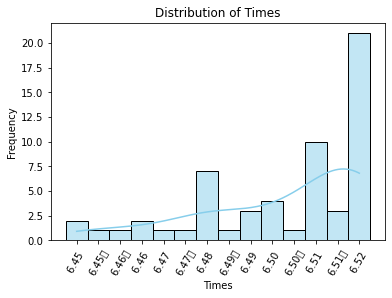

In [27]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(Mens60mDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

#Make names more readable
plt.xticks(rotation=60)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Mens 60m')

# Show the plot
plt.show()

C:\Users\MoJo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


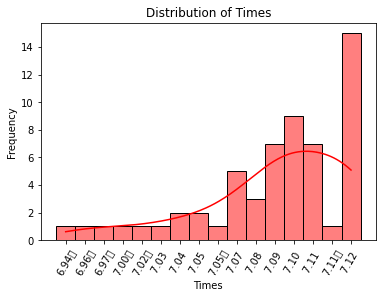

In [28]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(Womens60mDF[column_name], bins=20, kde=True, color='red', edgecolor='black')


#Make names more readable
plt.xticks(rotation=60)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Womens 60m')

# Show the plot
plt.show()

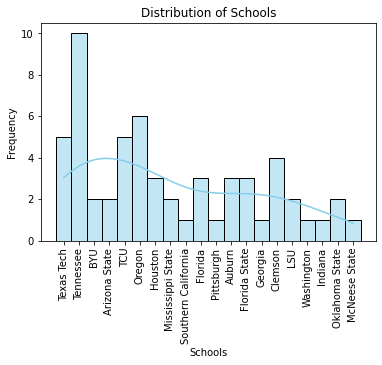

In [29]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(Mens60mDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Mens 60m')

#Make names more readable
plt.xticks(rotation=90)


# Show the plot
plt.show()

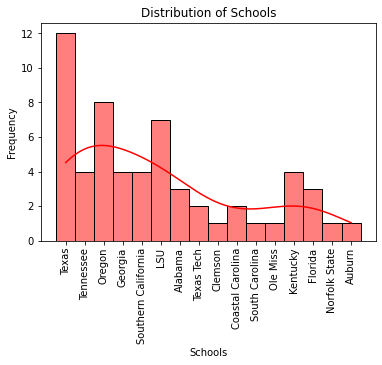

In [30]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(Womens60mDF[column_name], bins=20, kde=True, color='red', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Womens 60m')

#Make names more readable
plt.xticks(rotation=90)

# Show the plot
plt.show()